### 1. setting and data

In [1]:
#install module
!pip install --upgrade pip
!pip install pyyaml pandas numpy matplotlib seaborn scikit-learn tensorflow-macos keras
!pip install opencv-python

In [2]:
import sys, os

# 현재 실행 중인 노트북 기준 루트 디렉토리 잡기 (notebook과 config 폴더가 같은 상위 폴더에 있어야 함)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [3]:
#import module
import yaml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config.load_config import load_config
from data.split_dataset import data_count, split_dataset_by_class
from data.dataloader import get_generators
from data.dataloader import show_images
from models.build_model import get_model
from models.build_model import build_model
from train.optimizer import get_optimizer
from train.callbacks import get_callbacks
from train.trainer import train_model
from utils.evaluation import evaluate_model
from utils.evaluation import plot_confusion_matrix
from utils.evaluation import plot_train_history
from utils.evaluation import show_top_misclassified
from utils.save_results import save_results


/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [4]:
# Load configuration
config = load_config('/Users/vnlt/PROJECT/ex-cnn-cv/config/config.yaml')
data_dir = f"{config['base_output_dir']}/seed{config['seed']}"
batch_size = config['batch_size']



In [5]:
print(type(config))
print(config)


<class 'dict'>
{'experiment_id': 'resnet_colormap_v1', 'backbone_name': 'EfficientNetB0', 'original_dataset_dir': '/Volumes/PortableSSD/data', 'base_output_dir': '/Users/vnlt/PROJECT/ex-cnn-cv/data/dataset', 'input_shape': [224, 224, 3], 'train_ratio': 0.7, 'val_ratio': 0.2, 'test_ratio': 0.1, 'seed': 42, 'augmentations': None, 'epochs': 3, 'batch_size': 5, 'optimizer': 'adamw', 'learning_rate': 0.0001, 'patience': 7, 'dropout_rate': 0.5, 'save_best_only': True, 'model_save_dir': None, 'num_classes': 5}


In [ ]:
# split dataset
class_image_counts, images, min_count = data_count(
    original_dataset_dir=config['original_dataset_dir']
)

split_dataset_by_class(
    original_dataset_dir=config['original_dataset_dir'],
    min_count=min_count,
    images=images,
    base_output_dir=f"{config['base_output_dir']}/seed{config['seed']}",
    train_ratio=config['train_ratio'],
    val_ratio=config['val_ratio'],
    test_ratio=config['test_ratio'],
    seed=config['seed']
)

In [6]:
# data generators - preprocessing and augmentation
train_gen, val_gen, test_gen = get_generators(
    model_name=config['backbone_name'],
    input_shape=tuple(config['input_shape']),
    batch_size=config['batch_size'],
    data_dir=data_dir,
    augmentations=config['augmentations']
)

Found 50 images belonging to 5 classes.
Found 5 images belonging to 5 classes.
Found 15 images belonging to 5 classes.


Training Data image ex:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..248.8017].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..254.90338].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


✅ 이미지 로딩 확인: (224, 224, 3) float32 0.0 248.8017


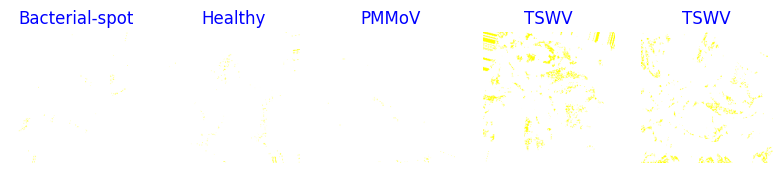

Validation Data image ex:


/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/PIL/Image.py:3442: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


✅ 이미지 로딩 확인: (224, 224, 3) float32 0.0 255.0


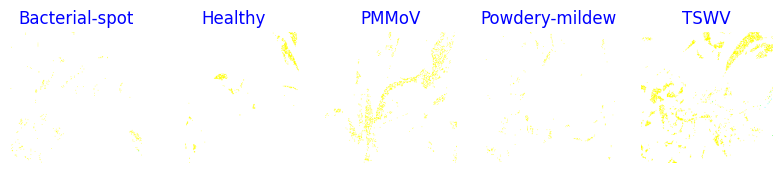

In [7]:
# show dataset
print("Training Data image ex:")
show_images(train_gen)
print("Validation Data image ex:")
show_images(val_gen)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.42265645..0.5923961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.5909832].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4718888..0.5923961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.47499645..0.5923961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.411696..0.40651852].


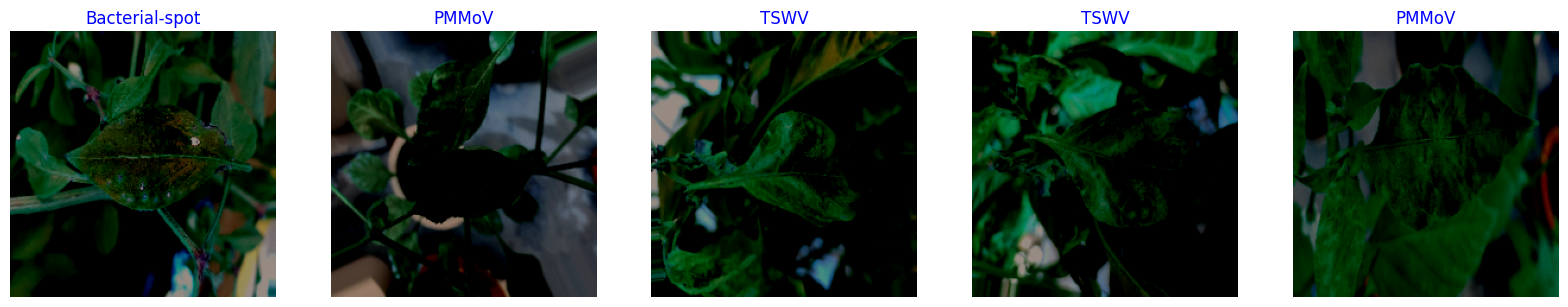

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4458039..0.56102353].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.5923961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4850196..0.5923961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.4458039..0.5923961].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.46149018..0.5923961].


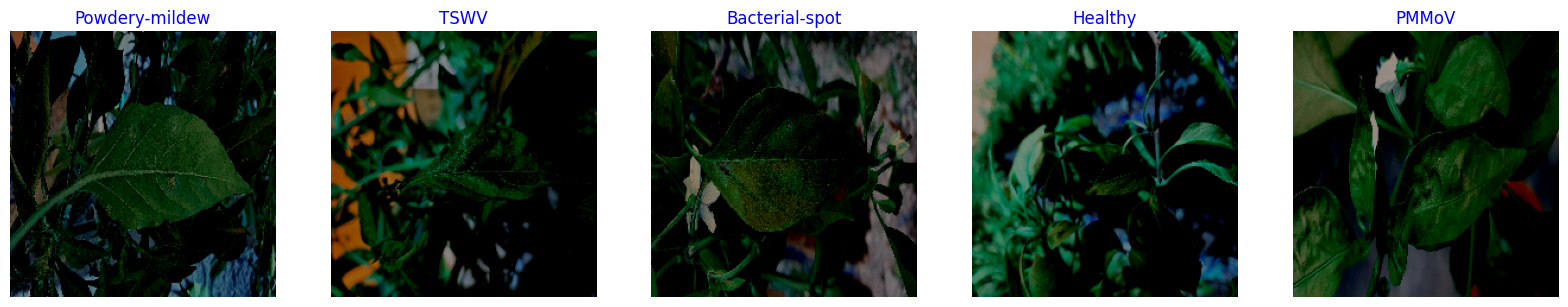

In [8]:
def show_samples(gen):
    '''
    This function take the data generator and show sample of the images
    '''

    # return classes , images to be displayed
    g_dict = gen.class_indices        # defines dictionary {'class': index}
    classes = list(g_dict.keys())     # defines list of dictionary's kays (classes), classes names : string
    images, labels = next(gen)        # get a batch size samples from the generator

    # calculate number of displayed samples
    length = len(labels)        # length of batch size
    sample = min(length, 25)    # check if sample less than 25 images

    plt.figure(figsize= (20, 20))

    for i in range(sample):
        plt.subplot(5, 5, i + 1)
        image = images[i] / 255       # scales data to range (0 - 255)
        plt.imshow(image)
        index = np.argmax(labels[i])  # get image index
        class_name = classes[index]   # get class of image
        plt.title(class_name, color= 'blue', fontsize= 12)
        plt.axis('off')
    plt.show()
    
show_samples(train_gen)
show_samples(val_gen)

### 2. model training

In [9]:
# model structure
model = build_model(
    backbone_name=config['backbone_name'],
    input_shape=tuple(config['input_shape']),
    num_classes=config['num_classes'],
    dropout_rate=config['dropout_rate']
)
# compile model
optimizer = get_optimizer(
    optimizer_name=config['optimizer'],
    learning_rate=config['learning_rate'],
    weight_decay=config.get('weight_decay', 0.0)
)

callbacks = get_callbacks(
    model_name=config['backbone_name'],
    save_dir=f"results/{config['experiment_id']}",
    patience=config['patience']
)

In [10]:
# model training
history = train_model(
    model,
    train_gen,
    val_gen,
    epochs=config['epochs'],
    callbacks=callbacks,
    optimizer=optimizer
)

/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 677ms/step - accuracy: 0.3872 - loss: 1.5269

10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 920ms/step - accuracy: 0.3865 - loss: 1.5252 - val_accuracy: 0.4000 - val_loss: 1.2909 - learning_rate: 1.0000e-04
Epoch 2/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 691ms/step - accuracy: 0.6427 - loss: 1.0928

10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 781ms/step - accuracy: 0.6425 - loss: 1.0837 - val_accuracy: 0.6000 - val_loss: 0.8863 - learning_rate: 1.0000e-04
Epoch 3/3
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 707ms/step - accuracy: 0.8365 - loss: 0.4791

10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 792ms/step - accuracy: 0.8405 - loss: 0.4761 - val_accuracy: 0.8000 - val_loss: 0.7884 - learning_rate: 1.0000e-04


### 3. evaluation and results

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [12]:
y_true, y_pred, y_prob = evaluate_model(model, test_gen)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step


In [13]:
from collections import Counter
print(Counter(test_gen.classes))


Counter({0: 3, 1: 3, 2: 3, 3: 3, 4: 3})


In [14]:
# 원래 class_indices 출력
print("Original class_indices (class name → index):")
print(test_gen.class_indices)

Original class_indices (class name → index):
{'Bacterial-spot': 0, 'Healthy': 1, 'PMMoV': 2, 'Powdery-mildew': 3, 'TSWV': 4}


In [15]:
class_names = list(test_gen.class_indices.keys())

In [16]:
print("클래스 인덱스 딕셔너리:", class_names)
print("y_true에서 고유값들:", np.unique(y_true))
print("y_pred에서 고유값들:", np.unique(y_pred))


클래스 인덱스 딕셔너리: ['Bacterial-spot', 'Healthy', 'PMMoV', 'Powdery-mildew', 'TSWV']
y_true에서 고유값들: [0 1 2 3 4]
y_pred에서 고유값들: [0 1 2 4]


In [17]:
print("y_true shape:", y_true.shape)
print("y_true sample:", y_true[:5])


y_true shape: (15,)
y_true sample: [0 0 0 1 1]


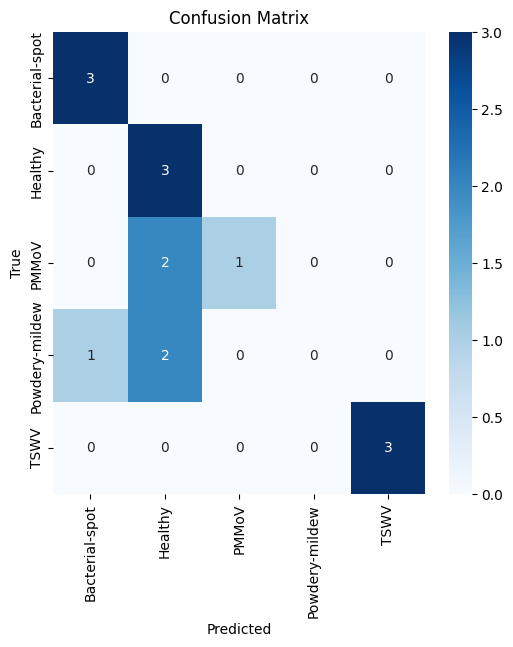

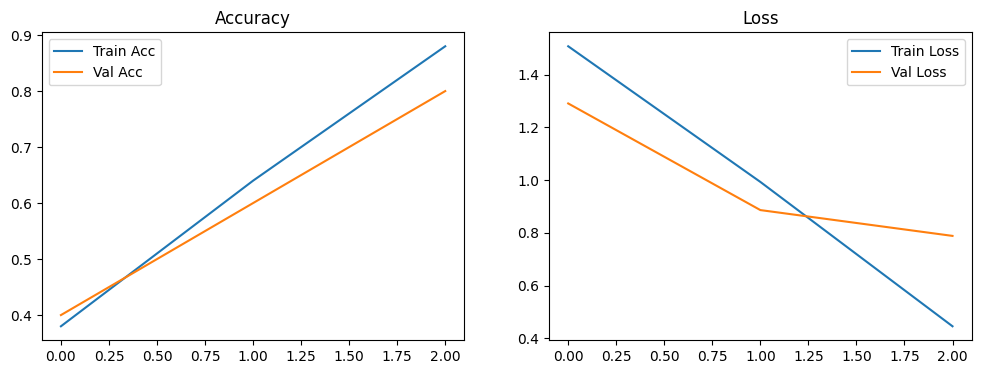

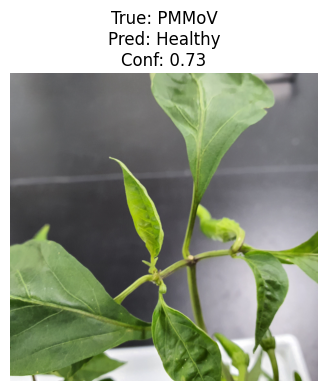

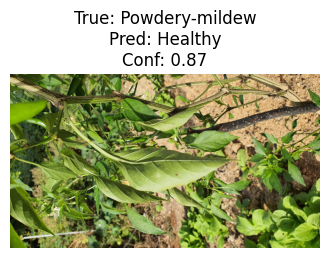

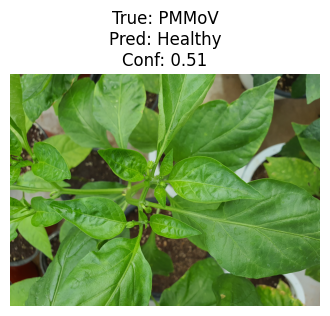

In [18]:
# results visualization
cm = confusion_matrix(y_true, y_pred)


plot_confusion_matrix(cm, class_names, title="Confusion Matrix")
plot_train_history(history)

show_top_misclassified(
    y_true,
    y_pred,
    y_prob,
    class_names,
    generator=test_gen,
    model_name=config['experiment_id'],
    save_dir=f"results/{config['experiment_id']}",
    top_n=3
)

### 4. results save

In [19]:

result_dir = f"/Users/vnlt/PROJECT/ex-cnn-cv/notebooks/results/{config['experiment_id']}"
save_results(
    model_name=config['experiment_id'],
    history=history,
    cm=confusion_matrix(y_true, y_pred),
    class_names=list(test_gen.class_indices.keys()),
    report=classification_report(y_true, y_pred, target_names=list(test_gen.class_indices.keys()), output_dict=True),
    result_dir= result_dir
)

print(f"\u2705 저장 완료: results/{config['experiment_id']}")


✅ 저장 완료: results/resnet_colormap_v1


/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/vnlt/PROJECT/ex-cnn-cv/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitaliz